## Scikit-Learn Regression Analysis
**Goal 1:** Predict total freight cost. Determine five possible ways to reduce freight costs based on insights.  
**Goal 2:** Predict throughput. How can the results enable sales order entry staff the capability of quoting more accurate lead times to customers?

# Goal 1

In [1]:
# importing libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import autosklearn.regression

In [2]:
# importing dataset
df = pd.read_csv('https://raw.githubusercontent.com/crosstrack10/data-science-projects/main/datasets/dataset_4.csv', sep='\t')

# chaning pandas setting to display all columns
pd.set_option('display.max_columns', None)

# displaying first five rows
df.head(2)

,Sales Order Number,Quantity,Unit List Price,Production Order Number,Customer for-Order,Order Date,Commit Date,Ship Date,Throughput,Days Late,Late Flag,Component A Inven,Component B Inven,Component C Inven,Component D Inven,Late Code,Routing to Work Center,Work Center Sequence,AAAA-Actual Labor,AAAB-Actual Labor,AAAC-Actual Labor,AAAD-Actual Labor,AAAE-Actual Labor,AAAF-Actual Labor,AAAG-Actual Labor,AAAH-Actual Labor,AAAI-Actual Labor,AAAJ-Actual Labor,AAAK-Actual Labor,AAAL-Actual Labor,AAAM-Actual Labor,AAAN-Actual Labor,AAAO-Actual Labor,AAAP-Actual Labor,AAAQ-Actual Labor,AAAR-Actual Labor,AAAS-Actual Labor,AAAT-Actual Labor,AAAU-Actual Labor,Average Hourly Labor Rate,Component A Unit Cost,Component A Lead Time,Component B unit Cost,Component B Lead Time,Component C Unit Cost,Component C Lead Time,Component D Unit Cost,Component D Lead Time,Delivery Number,Carrier,Base Freight,Premium,Total Freight Cost,Total Labor Cost,Total Material Cost,QTY X List Price,Gross Margin
0,O-10047,12,650,P-10047,1,5/28/2011,6/27/2011,6/30/2011,33,3.128457,Late,36.532627,4.830645,264.384545,867.642704,Credit Hold on Customer,R-21,AAAL-AAAM-AAAN-AAAO-AAAP-AAAQ-AAAR-AAAS-AAAT-AAAU,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,3,36,3,17,5,5,25,2,30,10,40,20,D-10047,CarrierA,1000,500,1500,12852,1200,7800,-7752
1,O-10047,12,650,P-10047,1,5/28/2011,6/27/2011,6/30/2011,33,3.128457,Late,36.532627,4.830645,264.384545,867.642704,Credit Hold on Customer,R-21,AAAL-AAAM-AAAN-AAAO-AAAP-AAAQ-AAAR-AAAS-AAAT-AAAU,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,3,36,3,17,5,5,25,2,30,10,40,20,D-10047,CarrierA,1000,500,1500,12852,1200,7800,-7752


In [3]:
# dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Sales Order Number         193 non-null    object 
 1   Quantity                   193 non-null    int64  
 2   Unit List Price            193 non-null    int64  
 3   Production Order Number    193 non-null    object 
 4   Customer for-Order         193 non-null    int64  
 5   Order Date                 193 non-null    object 
 6   Commit Date                193 non-null    object 
 7   Ship Date                  193 non-null    object 
 8   Throughput                 193 non-null    int64  
 9   Days Late                  193 non-null    float64
 10  Late Flag                  193 non-null    object 
 11  Component A Inven          193 non-null    float64
 12  Component B Inven          193 non-null    float64
 13  Component C Inven          193 non-null    float64

In [4]:
# general numerical statistics
df.describe()

,Quantity,Unit List Price,Customer for-Order,Throughput,Days Late,Component A Inven,Component B Inven,Component C Inven,Component D Inven,AAAA-Actual Labor,AAAB-Actual Labor,AAAC-Actual Labor,AAAD-Actual Labor,AAAE-Actual Labor,AAAF-Actual Labor,AAAG-Actual Labor,AAAH-Actual Labor,AAAI-Actual Labor,AAAJ-Actual Labor,AAAK-Actual Labor,AAAL-Actual Labor,AAAM-Actual Labor,AAAN-Actual Labor,AAAO-Actual Labor,AAAP-Actual Labor,AAAQ-Actual Labor,AAAR-Actual Labor,AAAS-Actual Labor,AAAT-Actual Labor,AAAU-Actual Labor,Average Hourly Labor Rate,Component A Unit Cost,Component A Lead Time,Component B unit Cost,Component B Lead Time,Component C Unit Cost,Component C Lead Time,Component D Unit Cost,Component D Lead Time,Base Freight,Premium,Total Freight Cost,Total Labor Cost,Total Material Cost,QTY X List Price,Gross Margin
count,193.0,193.0,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.0,193.0,193.0,193.0,193.0,193.0,193.0,193.0,193.0,193.000000,193.000000,193.000000,193.000000,193.0,193.0,193.000000
mean,12.0,650.0,7.264249,35.150259,5.577174,98.189700,2.854897,303.919149,2880.114629,5.569948,1.414508,1.367876,1.336788,1.259067,1.243523,1.243523,1.336788,2.450777,1.523316,1.383420,1.476684,1.430052,1.476684,1.616580,1.601036,1.647668,1.569948,1.538860,10.248705,1.430052,17.0,5.0,5.0,25.0,2.0,30.0,10.0,40.0,20.0,256.217617,103.626943,359.844560,9009.823834,1200.0,7800.0,-2769.668394
std,0.0,0.0,11.836016,8.966559,8.943653,60.545943,2.785304,178.417414,1063.907587,28.388241,1.501457,1.498056,1.494972,1.484375,1.481754,1.481754,1.494972,5.333553,1.503719,1.499352,1.503719,1.502265,1.503719,1.499352,1.500486,1.496596,1.502265,1.503396,21.802626,1.502265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184.666632,118.089416,283.038713,7479.643005,0.0,0.0,7537.163822
min,12.0,650.0,1.000000,28.000000,-1.934252,-66.898780,-5.439585,-147.154880,325.492225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.0,5.0,5.0,25.0,2.0,30.0,10.0,40.0,20.0,150.000000,0.000000,150.000000,6120.000000,1200.0,7800.0,-67752.000000
25%,12.0,650.0,1.000000,29.000000,-0.394285,51.486631,0.881208,175.900420,2147.842700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.0,5.0,5.0,25.0,2.0,30.0,10.0,40.0,20.0,150.000000,0.000000,200.000000,6120.000000,1200.0,7800.0,-2676.000000
50%,12.0,650.0,2.000000,32.000000,2.695128,96.237425,2.861884,284.738484,2921.308282,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000,17.0,5.0,5.0,25.0,2.0,30.0,10.0,40.0,20.0,200.000000,150.000000,300.000000,6120.000000,1200.0,7800.0,180.000000
75%,12.0,650.0,4.000000,38.000000,8.050716,140.597119,4.830645,401.998568,3585.888408,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,17.0,5.0,5.0,25.0,2.0,30.0,10.0,40.0,20.0,300.000000,150.000000,350.000000,8976.000000,1200.0,7800.0,280.000000
max,12.0,650.0,50.000000,79.000000,49.506685,258.881440,10.897537,818.324777,5236.858878,300.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,29.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,99.000000,3.000000,17.0,5.0,5.0,25.0,2.0,30.0,10.0,40.0,20.0,1000.000000,500.000000,1500.000000,74052.000000,1200.0,7800.0,330.000000


In [5]:
# counting data types
df.dtypes.value_counts()

int64      41
object     11
float64     5
dtype: int64

In [6]:
# counting feature nulls
feat_null_counts = df.isna().sum().sort_values(ascending=False)
feat_null_counts[feat_null_counts > 0]

Late Code    83
dtype: int64

In [7]:
# removing features with at least 60% nulls or 60% zeros
drop_cols = df.columns[((df == np.nan).sum() > (0.60 * df.shape[1])) | ((df == 0).sum() > (0.60 * df.shape[1]))]
df.drop(drop_cols, axis=1, inplace=True)

In [8]:
# counting features with less than 50% zeros
len(df.columns[(df == 0).sum() <= (0.60 * df.shape[1])])

35

In [9]:
# column data types
df.dtypes.index

Index(['Sales Order Number', 'Quantity', 'Unit List Price',
       'Production Order Number', 'Customer for-Order', 'Order Date',
       'Commit Date', 'Ship Date', 'Throughput', 'Days Late', 'Late Flag',
       'Component A Inven', 'Component B Inven', 'Component C Inven',
       'Component D Inven', 'Late Code', 'Routing to Work Center',
       'Work Center Sequence', 'Average Hourly Labor Rate',
       'Component A Unit Cost', 'Component A Lead Time',
       'Component B unit Cost', 'Component B Lead Time',
       'Component C Unit Cost', 'Component C Lead Time',
       'Component D Unit Cost', 'Component D Lead Time', 'Delivery Number',
       'Carrier', 'Base Freight', 'Total Freight Cost', 'Total Labor Cost',
       'Total Material Cost', 'QTY X List Price', 'Gross Margin'],
      dtype='object')

In [10]:
# dropping unimportant variables from dataframe based on total freight cost target
df.drop(['Sales Order Number', 'Production Order Number', 'Customer for-Order', 'Order Date',
         'Commit Date', 'Ship Date', 'Days Late', 'Late Flag', 'Late Code', 'Delivery Number'], 
        axis=1, inplace=True)

In [11]:
# storing columns and data types in dictionary
cols_df = pd.DataFrame(df.dtypes, columns=['data_type']).reset_index()
cols_df.rename(columns={'index':'cols'}, inplace=True)

In [12]:
# categorical variables
cat_columns = list(cols_df.loc[cols_df.data_type == 'object', 'cols'])
print('Categorical:', cat_columns, '\n')

# numerical variables
num_columns = list(cols_df.loc[cols_df.data_type != 'object', 'cols'])
num_columns.remove('Total Freight Cost')
print('Numerical:', num_columns)

Categorical: ['Routing to Work Center', 'Work Center Sequence', 'Carrier'] 

Numerical: ['Quantity', 'Unit List Price', 'Throughput', 'Component A Inven', 'Component B Inven', 'Component C Inven', 'Component D Inven', 'Average Hourly Labor Rate', 'Component A Unit Cost', 'Component A Lead Time', 'Component B unit Cost', 'Component B Lead Time', 'Component C Unit Cost', 'Component C Lead Time', 'Component D Unit Cost', 'Component D Lead Time', 'Base Freight', 'Total Labor Cost', 'Total Material Cost', 'QTY X List Price', 'Gross Margin']


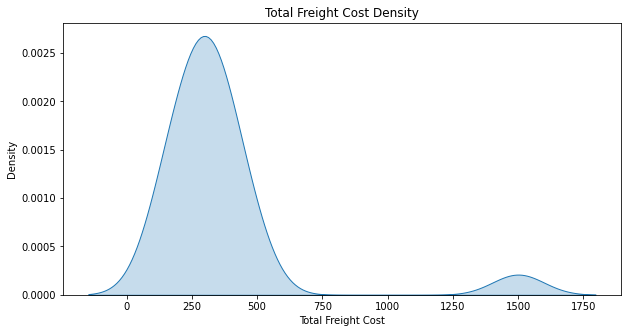

In [13]:
# checking label distribution density
plt.figure(figsize=(10,5))
ax = sns.kdeplot(x='Total Freight Cost', data=df, fill=True)
plt.title('Total Freight Cost Density');

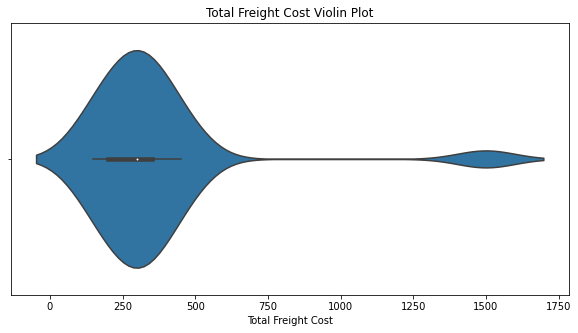

In [14]:
# checking label using violin plot
plt.figure(figsize=(10,5))
ax = sns.violinplot(x='Total Freight Cost', data=df)
plt.title('Total Freight Cost Violin Plot');

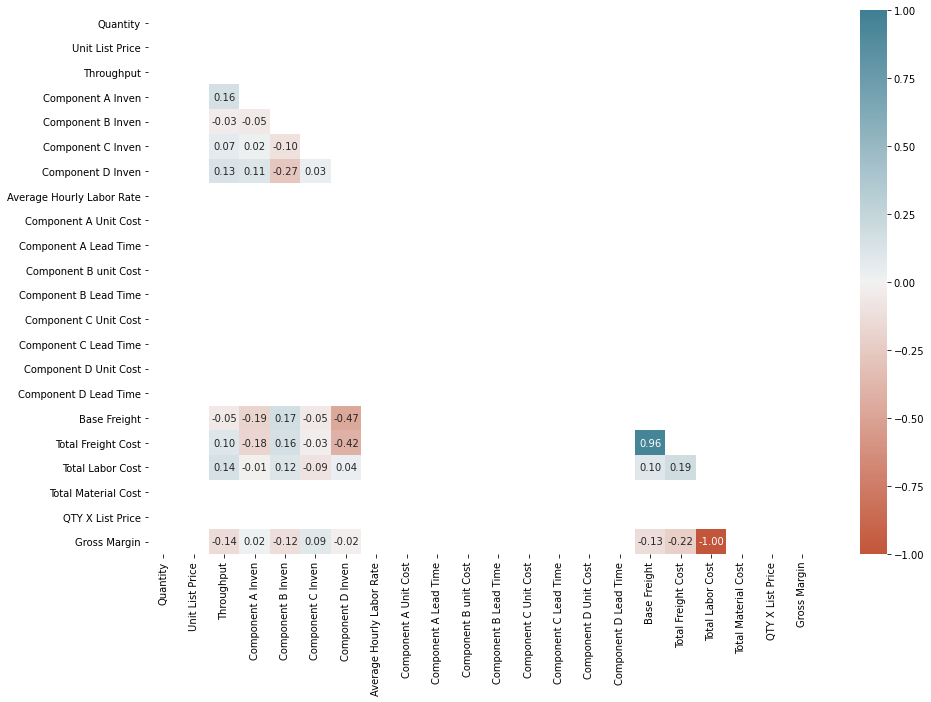

In [15]:
# Creating correlation matrix
corr_matrix = df.corr()

# visualizing it
plt.figure(figsize = (15,10))
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, mask = mask, annot = True, vmin = -1, vmax = 1, 
            cmap = sns.diverging_palette(20, 220, as_cmap=True), fmt = ".2f")
plt.show()

In [16]:
# splitting features and target
X = df.drop(['Total Freight Cost'], axis=1)
y = df['Total Freight Cost']

## Machine Learning Pipeline

In [17]:
# importing scikit-learn packages
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [18]:
# dividing dataset into features and target
X = df.drop(['Total Freight Cost'], axis=1)
y = df['Total Freight Cost']

# splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20,shuffle=True, random_state=42)

In [19]:
# checking shapes of train test split
print('X_train: ', X_train.shape, 'X_test: ', X_test.shape, 'y_train: ', y_train.shape, 'X_test: ', y_test.shape, sep="\n")

X_train: 
(154, 24)
X_test: 
(39, 24)
y_train: 
(154,)
X_test: 
(39,)


In [20]:
# creating preprocessing objects
simple_imp = SimpleImputer(strategy = "median")
constant_imp = SimpleImputer(strategy = "most_frequent")
ohe = OneHotEncoder(handle_unknown = "ignore")
scaler = StandardScaler()

In [21]:
# creating pipeline for categorical variable transformations
imp_cat = make_pipeline(constant_imp, ohe)

In [22]:
# creating pipeline for numerical variable transformations
imp_num = make_pipeline(simple_imp, scaler)

Creating a column transformer to facilitate variable transformations.

In [23]:
# transforming variables using a column transformer
ct_imputer = make_column_transformer(
    (imp_cat, cat_columns),
    (imp_num, num_columns)
)

In [24]:
# creating an instances of regression models
linreg = LinearRegression()
gbrreg = GradientBoostingRegressor()
svrreg = SVR()
bayreg = BayesianRidge()
sgdreg = SGDRegressor()

In [25]:
# creating a pipelines
linreg_pipe = make_pipeline(ct_imputer, linreg)
linreg_pipe.fit(X_train, y_train);
gbrreg_pipe = make_pipeline(ct_imputer, gbrreg)
gbrreg_pipe.fit(X_train, y_train);
svrreg_pipe = make_pipeline(ct_imputer, svrreg)
svrreg_pipe.fit(X_train, y_train);
bayreg_pipe = make_pipeline(ct_imputer, bayreg)
bayreg_pipe.fit(X_train, y_train);
sgdreg_pipe = make_pipeline(ct_imputer, sgdreg)
sgdreg_pipe.fit(X_train, y_train);

In [26]:
# importing cross val score function
from sklearn.model_selection import cross_val_score

# creating cross val score function for scikit models
def cross_val_score_metrics(model_pipeline, feature_set=X_train, label_vect=y_train, cfolds=5):
    model_name = str(list(model_pipeline.named_steps.values())[1]).replace('()', '')
    list_of_scores = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
    scores_dict = {}
    for metric in [(metric) for metric in list_of_scores]:
        scores_dict[model_name + ' - ' + metric] = round(cross_val_score(model_pipeline, X=feature_set, y=label_vect, cv=cfolds, scoring=metric).mean(), 2)
    return scores_dict

In [27]:
# comparing models
model_list = [linreg_pipe, gbrreg_pipe, svrreg_pipe, bayreg_pipe, sgdreg_pipe]

# using custom function on each model and storing results in a dataframe
df_performance = pd.DataFrame(columns=['model_metric', 'scores'])

for model in model_list:
    cur_model = cross_val_score_metrics(model)
    performance_keys = pd.Series(cur_model.keys())
    performance_values = pd.Series(cur_model.values())
    series_dict = {'model_metric': performance_keys,
                   'scores': performance_values}
    df_append = pd.concat(series_dict, axis=1)
    df_performance = df_performance.append(df_append)

In [28]:
# displaying results
df_performance

,model_metric,scores
0,LinearRegression - neg_mean_absolute_error,-0.00
1,LinearRegression - neg_mean_squared_error,-0.00
2,LinearRegression - neg_root_mean_squared_error,-0.00
3,LinearRegression - r2,1.00
0,GradientBoostingRegressor - neg_mean_absolute_...,-0.27
1,GradientBoostingRegressor - neg_mean_squared_e...,-1.15
2,GradientBoostingRegressor - neg_root_mean_squa...,-0.59
3,GradientBoostingRegressor - r2,1.00
0,SVR - neg_mean_absolute_error,-129.30
1,SVR - neg_mean_squared_error,-82188.88


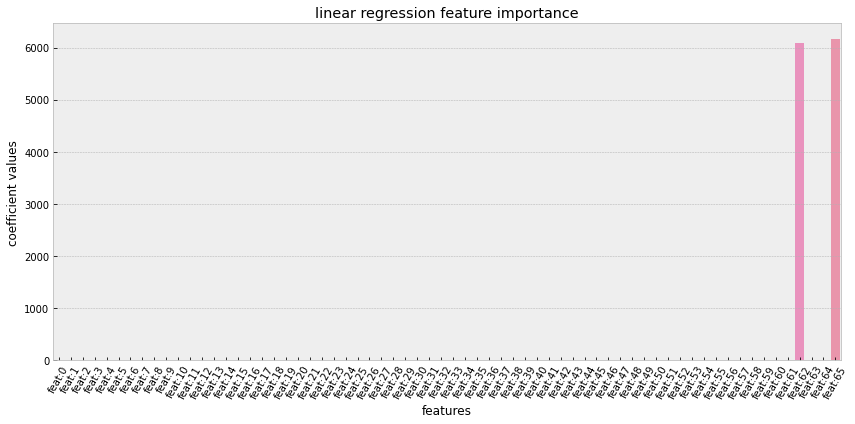

In [29]:
# retrieving equation intercept and standarized coefficients
intercept = linreg_pipe.named_steps.linearregression.intercept_
coefs = linreg_pipe.named_steps.linearregression.coef_
    
# plot feature importance
plt.style.use('bmh')
plt.figure(figsize=(12,6))

ax = sns.barplot(['feat:' + str(x) for x in range(len(coefs))], abs(coefs))
plt.title('linear regression feature importance')
plt.xlabel('features')
plt.ylabel('coefficient values')
plt.xticks(rotation=60)
plt.tight_layout()

In [30]:
# columnn names before one hot encoding
for i, column in enumerate(X_train.columns):
    print(i + 1, column)

1 Quantity
2 Unit List Price
3 Throughput
4 Component A Inven
5 Component B Inven
6 Component C Inven
7 Component D Inven
8 Routing to Work Center
9 Work Center Sequence
10 Average Hourly Labor Rate
11 Component A Unit Cost
12 Component A Lead Time
13 Component B unit Cost
14 Component B Lead Time
15 Component C Unit Cost
16 Component C Lead Time
17 Component D Unit Cost
18 Component D Lead Time
19 Carrier
20 Base Freight
21 Total Labor Cost
22 Total Material Cost
23 QTY X List Price
24 Gross Margin
